In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
train_path = '/content/drive/MyDrive/COVID-19 Dataset/CT/train'
# valid_path = 'data/dogs-vs-cats/valid'
test_path = '/content/drive/MyDrive/COVID-19 Dataset/CT/test'

In [6]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['COVID', 'Non-COVID'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['COVID', 'Non-COVID'], batch_size=10, shuffle=False)

Found 6217 images belonging to 2 classes.
Found 1554 images belonging to 2 classes.


In [7]:
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

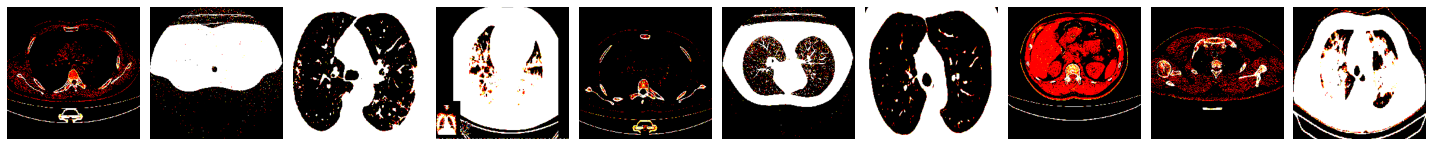

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [8]:
plotImages(imgs)
print(labels)  
# the color data was skewed as a result of preprocessing the images using the tf.keras.applications.vgg16.preprocess_input function.

In [9]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 13s 0us/step


In [1]:
#The original trained VGG16 model, along with its saved weights and other parameters, is now downloaded.

In [10]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [12]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
    

In [13]:
for layer in model.layers:
    layer.trainable = False

In [14]:
model.add(Dense(units=2, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [23]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x = train_batches, 
          steps_per_epoch = len(train_batches),
          epochs = 5
         )

Epoch 1/5
622/622 [==============================] - 3272s 5s/step - loss: 0.3621 - accuracy: 0.8308
Epoch 2/5
622/622 [==============================] - 80s 129ms/step - loss: 0.2001 - accuracy: 0.9182
Epoch 3/5
622/622 [==============================] - 80s 129ms/step - loss: 0.1763 - accuracy: 0.9321
Epoch 4/5
622/622 [==============================] - 80s 129ms/step - loss: 0.1426 - accuracy: 0.9457
Epoch 5/5
622/622 [==============================] - 80s 129ms/step - loss: 0.1202 - accuracy: 0.9564


In [25]:
model.fit(x = train_batches, 
          steps_per_epoch = len(train_batches),
          epochs = 11
         )

Epoch 1/11
622/622 [==============================] - 81s 130ms/step - loss: 0.1101 - accuracy: 0.9625
Epoch 2/11
622/622 [==============================] - 81s 130ms/step - loss: 0.0995 - accuracy: 0.9662
Epoch 3/11
622/622 [==============================] - 81s 129ms/step - loss: 0.0916 - accuracy: 0.9701
Epoch 4/11
622/622 [==============================] - 81s 130ms/step - loss: 0.0845 - accuracy: 0.9723
Epoch 5/11
622/622 [==============================] - 80s 129ms/step - loss: 0.0779 - accuracy: 0.9747
Epoch 6/11
622/622 [==============================] - 80s 129ms/step - loss: 0.0736 - accuracy: 0.9775
Epoch 7/11
622/622 [==============================] - 80s 129ms/step - loss: 0.0665 - accuracy: 0.9805
Epoch 8/11
622/622 [==============================] - 81s 130ms/step - loss: 0.0641 - accuracy: 0.9799
Epoch 9/11
622/622 [==============================] - 81s 131ms/step - loss: 0.0579 - accuracy: 0.9831
Epoch 10/11
622/622 [==============================] - 80s 129ms/step - l

In [41]:
test_eval = model.evaluate(train_batches)


print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

622/622 [==============================] - 80s 128ms/step - loss: 0.0451 - accuracy: 0.9900
Test loss: 0.04512294754385948
Test accuracy: 0.9900273680686951


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

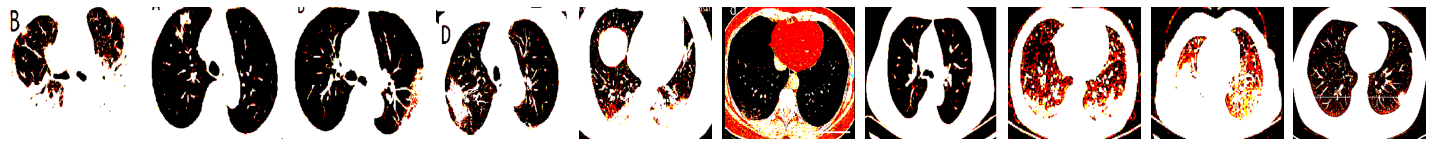

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [44]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [45]:
predictions = model.predict(x = test_batches, steps = len(test_batches), verbose = 0)

In [46]:
 def plot_confusion_matrix(cm, classes,
                           normalize=False,
                           title='Confusion matrix',
                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
     plt.imshow(cm, interpolation='nearest', cmap=cmap)
     plt.title(title)
     plt.colorbar()
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)

     if normalize:
         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
         print("Normalized confusion matrix")
     else:
         print('Confusion matrix, without normalization')

     print(cm)

     thresh = cm.max() / 2.
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

     plt.tight_layout()
     plt.ylabel('True label')
     plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1044   25]
 [  29  456]]


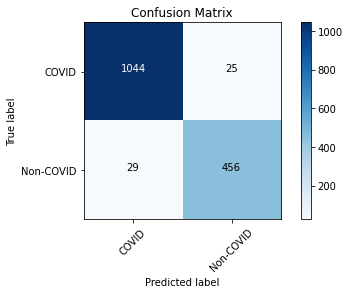

In [47]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['COVID','Non-COVID']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')